In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

"""
2019 Qihong Lu (qlu@princeton.edu)
this script is ...
- made for NEU|PSY 330 spring 2019 at princeton
- modified based on:
https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter06/random_walk.py
"""


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='talk', rc={"lines.linewidth": 2})

In [2]:
def run_agent(V, alpha=0.1):
    """let the model traverse through all states, and perform TD update
    Parameters
    ----------
    V : 1d array
        estimated values for all states
    alpha : float
        the learning rate
    Returns
    -------
    1d array
        updated values
    """
    td_error = np.zeros(n_states)
    for t in range(n_states-1):
        td_error[t] = R[t+1] + V[t+1] - V[t]
        V[t] += alpha * td_error[t]
    return V, td_error


# define the number of states
n_states = 10
# define the reward
R = np.zeros(n_states)
# the last t+1 has the reward
R[-1] = 1

# train the model
max_epochs = 2**8+1
value_log = np.zeros((max_epochs, n_states))
error_log = np.zeros((max_epochs, n_states))
#
V = np.zeros(n_states)
for i in range(max_epochs):
    value_log[i, :], error_log[i, :] = run_agent(V)

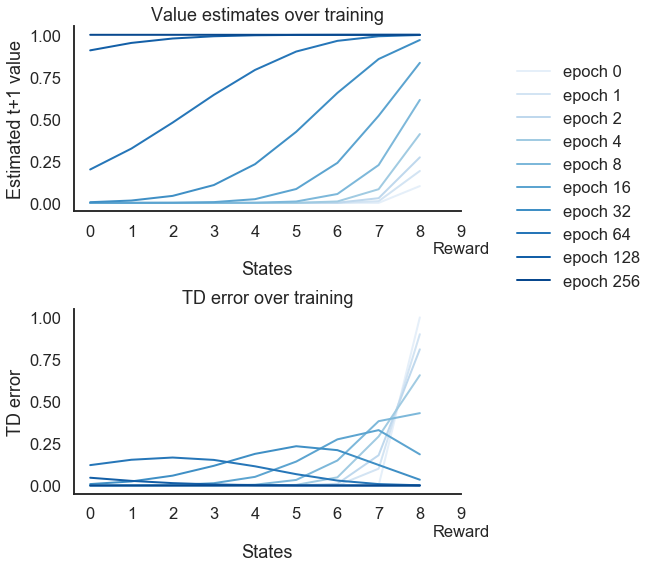

In [3]:
"""
show results
"""


def plot_helper(data_log, ax):
    for i, epoch_id in enumerate(episodes_to_plot):
        ax.plot(
            range(n_states-1), data_log[epoch_id, :-1],
            color=col_pal[i]
        )
    ax.set_xlabel('States')
    ax.set_xticks(range(n_states))
    xticklabels = [i for i in range(n_states)]
    xticklabels[-1] = f'{n_states-1}\nReward'
    ax.set_xticklabels(xticklabels)


# organize the results
episodes_to_plot = [0] + [2**k for k in np.arange(0, 9, 1)]
col_pal = sns.color_palette('Blues', n_colors=len(episodes_to_plot))

data = [value_log, error_log]
titles = ['Value estimates over training', 'TD error over training']
ylabels = ['Estimated t+1 value', 'TD error']

# plot the results
f, axes = plt.subplots(2, 1, figsize=(7, 8))
for i, ax in enumerate(axes):
    plot_helper(data[i], ax)
    ax.set_title(titles[i])
    ax.set_ylabel(ylabels[i])

f.legend([f'epoch {epoch_id}' for epoch_id in episodes_to_plot],
         frameon=False, bbox_to_anchor=(1.3, .9))
f.tight_layout()
sns.despine()